In [206]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, metrics
import ast
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv('prepared_data/back_2_seconds_accelerometer_only_normalized.csv')
df = df.drop(df.columns[0], axis=1)
df

,Category,Accelerometer,Duration
0,CLIMBING,"[[0.7330500483512878, 0.4930500090122223, 10.0...",2
1,CLIMBING,"[[-0.3169500231742859, 1.4239500761032104, 12....",2
2,CLIMBING,"[[0.3540000021457672, 3.427950143814087, 9.400...",2
3,CLIMBING,"[[0.2350500077009201, 3.6130502223968506, 8.53...",2
4,CLIMBING,"[[2.2360501289367676, -0.8350500464439392, 9.6...",2
...,...,...,...
207,DOWNTIME,"[[-5.512950420379639, 7.783050537109375, 1.072...",2
208,DOWNTIME,"[[-5.794950485229492, 7.659000396728516, 0.903...",2
209,DOWNTIME,"[[-5.656050205230713, 7.7470502853393555, 0.90...",2
210,DOWNTIME,"[[-5.664000034332275, 7.711050510406494, 0.691...",2


In [189]:
df = df.sample(frac=1)

In [190]:
# Convert string to list of list of floats
df['Accelerometer'] = df['Accelerometer'].apply(eval)
# df['Gyroscope'] = df['Gyroscope'].apply(eval)
# df['Magnetometer'] = df['Magnetometer'].apply(eval)

In [191]:
df['Accelerometer']

126    [[-4.537950038909912, 4.884000301361084, 4.594...
31     [[-5.19195032119751, 6.354000091552734, -4.726...
193    [[-5.395050048828125, 7.855050563812256, 1.284...
29     [[-6.370050430297852, 7.848000526428223, 1.027...
146    [[-5.094000339508057, 8.722050666809082, 0.703...
                             ...                        
201    [[-5.419050216674805, 7.788000583648682, 1.336...
158    [[-10.37505054473877, 9.258000373840332, 2.289...
103    [[-5.57295036315918, 7.07205057144165, 1.01295...
141    [[-6.492000102996826, 7.3999505043029785, 1.95...
132    [[-4.950000286102295, 9.133950233459473, 1.903...
Name: Accelerometer, Length: 212, dtype: object

In [192]:
def check_sublist_lengths(dataframe):
    accelerometer_col = dataframe['Accelerometer']
    for sublist in accelerometer_col:
        for subsublist in sublist:
            if len(subsublist) != 3:
                return False
    return True

In [193]:
print(check_sublist_lengths(df))

True


In [194]:
def remove_rows_by_category(data_frame_input):
    categories_to_remove = ["CLIMBING","FALLING"]
    mask = data_frame_input['Category'].isin(categories_to_remove)
    df_filtered = data_frame_input[~mask]
    return df_filtered

In [195]:
new_df = remove_rows_by_category(df)

In [196]:
new_df

,Category,Accelerometer,Duration
126,WALKING,"[[-4.537950038909912, 4.884000301361084, 4.594...",2
193,DOWNTIME,"[[-5.395050048828125, 7.855050563812256, 1.284...",2
146,WALKING,"[[-5.094000339508057, 8.722050666809082, 0.703...",2
163,DOWNTIME,"[[-5.07705020904541, 7.975050449371338, 1.6930...",2
211,DOWNTIME,"[[-5.464950084686279, 7.812000274658203, 0.871...",2
...,...,...,...
191,DOWNTIME,"[[-5.53695011138916, 7.795050144195557, 1.2790...",2
201,DOWNTIME,"[[-5.419050216674805, 7.788000583648682, 1.336...",2
158,WALKING,"[[-10.37505054473877, 9.258000373840332, 2.289...",2
141,WALKING,"[[-6.492000102996826, 7.3999505043029785, 1.95...",2


2 class classification

In [197]:
X_accelerometer = new_df['Accelerometer']

# Convert 'Accelerometer' column to a 2D NumPy array
X = np.array([np.mean(np.array(sample), axis=0) for sample in X_accelerometer])

# Split data into features (X) and labels (y)
y = new_df['Category'].values

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [198]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(3,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
precision = metrics.Precision()

# Compile and train the model
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1)

Epoch 1/200
84/84 [==============================] - 1s 1ms/step - loss: 0.7417 - accuracy: 0.3333
Epoch 2/200
84/84 [==============================] - 0s 1ms/step - loss: 0.7263 - accuracy: 0.2738
Epoch 3/200
84/84 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.4048
Epoch 4/200
84/84 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.5833
Epoch 5/200
84/84 [==============================] - 0s 1ms/step - loss: 0.7081 - accuracy: 0.2976
Epoch 6/200
84/84 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4643
Epoch 7/200
84/84 [==============================] - 0s 1ms/step - loss: 0.7031 - accuracy: 0.4048
Epoch 8/200
84/84 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5119
Epoch 9/200
84/84 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5357
Epoch 10/200
84/84 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5833
Epoch 11/

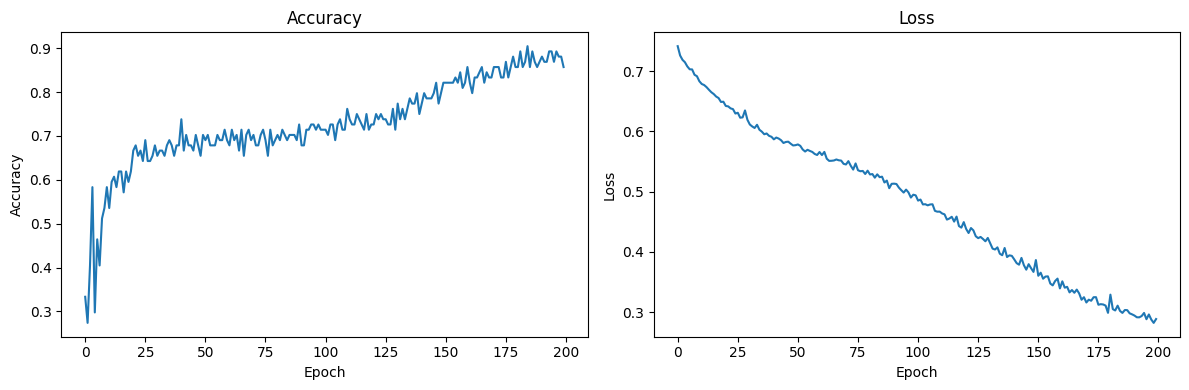

In [199]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [200]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

1/1 [==============================] - 0s 141ms/step - loss: 0.2464 - accuracy: 0.9091
Test Loss: 0.24642056226730347
Test Accuracy: 0.9090909361839294


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x142659310>>

Multi class classification

In [284]:
X_accelerometer = df['Accelerometer']

# Convert 'Accelerometer' column to a 2D NumPy array
X = np.array([np.mean(np.array(sample), axis=0) for sample in X_accelerometer])

# Split data into features (X) and labels (y)
y = df['Category'].values
print(type(y))
print(y)

# Encode labels as numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'numpy.ndarray'>
['WALKING' 'CLIMBING' 'DOWNTIME' 'CLIMBING' 'WALKING' 'DOWNTIME'
 'CLIMBING' 'FALLING' 'FALLING' 'DOWNTIME' 'FALLING' 'CLIMBING' 'DOWNTIME'
 'CLIMBING' 'FALLING' 'WALKING' 'FALLING' 'FALLING' 'FALLING' 'CLIMBING'
 'DOWNTIME' 'CLIMBING' 'CLIMBING' 'WALKING' 'DOWNTIME' 'DOWNTIME'
 'CLIMBING' 'WALKING' 'FALLING' 'DOWNTIME' 'FALLING' 'FALLING' 'CLIMBING'
 'WALKING' 'CLIMBING' 'DOWNTIME' 'FALLING' 'FALLING' 'WALKING' 'FALLING'
 'FALLING' 'FALLING' 'WALKING' 'CLIMBING' 'CLIMBING' 'WALKING' 'FALLING'
 'CLIMBING' 'DOWNTIME' 'CLIMBING' 'CLIMBING' 'WALKING' 'FALLING'
 'CLIMBING' 'CLIMBING' 'WALKING' 'WALKING' 'WALKING' 'CLIMBING' 'DOWNTIME'
 'CLIMBING' 'WALKING' 'FALLING' 'FALLING' 'FALLING' 'FALLING' 'DOWNTIME'
 'DOWNTIME' 'CLIMBING' 'WALKING' 'WALKING' 'WALKING' 'FALLING' 'WALKING'
 'DOWNTIME' 'CLIMBING' 'WALKING' 'FALLING' 'CLIMBING' 'DOWNTIME'
 'CLIMBING' 'FALLING' 'FALLING' 'CLIMBING' 'FALLING' 'DOWNTIME' 'DOWNTIME'
 'FALLING' 'DOWNTIME' 'DOWNTIME' 'CLIMBING' 'CLIMBI

In [202]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(3,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')
])
precision = metrics.Precision()

# Compile and train the model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=8)

Epoch 1/200
22/22 [==============================] - 1s 1ms/step - loss: 1.3689 - accuracy: 0.3728
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 1.0952 - accuracy: 0.6805
Epoch 3/200
22/22 [==============================] - 0s 1ms/step - loss: 0.9584 - accuracy: 0.6686
Epoch 4/200
22/22 [==============================] - 0s 1ms/step - loss: 0.8508 - accuracy: 0.7988
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 0.7603 - accuracy: 0.8580
Epoch 6/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.7751
Epoch 7/200
22/22 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.8698
Epoch 8/200
22/22 [==============================] - 0s 5ms/step - loss: 0.5760 - accuracy: 0.8462
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.8225
Epoch 10/200
22/22 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.8994
Epoch 11/

In [241]:
def display_training_plot(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

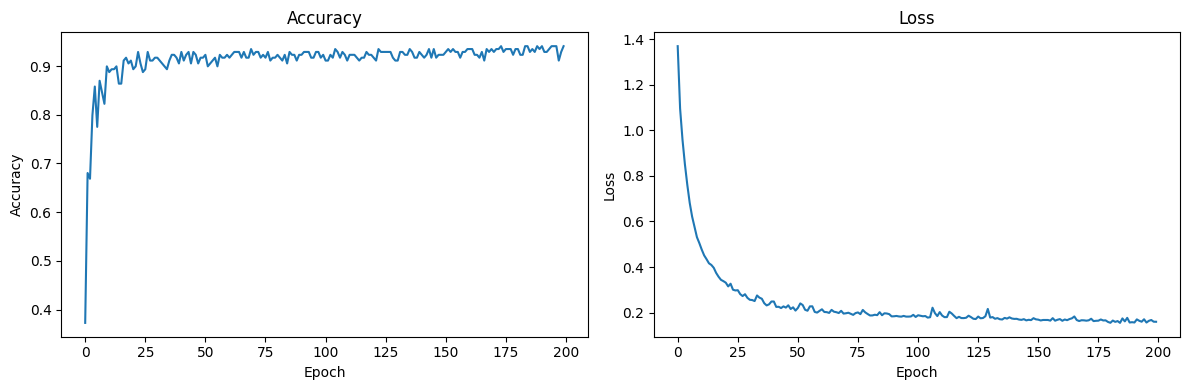

In [242]:
display_training_plot(history)

File's parts mutli class classification

In [204]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

2/2 [==============================] - 0s 4ms/step - loss: 0.2244 - accuracy: 0.9070
Test Loss: 0.2244424968957901
Test Accuracy: 0.9069767594337463


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x142ed09d0>>

In [270]:
# Przygotowanie danych wejściowych
X = np.array([np.array(sample) for sample in X_accelerometer],dtype=object)  # Zmieniamy na listę list

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kodowanie etykiet
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


print(y_test)

# Tworzenie modelu
model = keras.Sequential([
    keras.layers.SimpleRNN(32, input_shape=(None, 3)),  # None oznacza zmiennej długości sekwencji
    keras.layers.Dense(4, activation='softmax')
])
# Przekształcenie danych wejściowych do oczekiwanego formatu
X_train = np.expand_dims(X_train, axis=0)
y_train = np.expand_dims(y_train, axis=0)
X_test = np.expand_dims(X_test, axis=0)
y_test = np.expand_dims(y_test, axis=0)

# Konwersja danych wejściowych na listy
X_train = X_train.tolist()
y_train = y_train.tolist()
X_test = X_test.tolist()
y_test = y_test.tolist()

# Konwersja danych wejściowych na tensor nieregularny
X_train = tf.ragged.constant(X_train)
y_train = tf.ragged.constant(y_train)
X_test = tf.ragged.constant(X_test)
y_test = tf.ragged.constant(y_test)

# Tworzenie zestawu danych TensorFlow z pojedynczymi przykładami
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Kompilacja i trening modelu
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
history = model.fit(dataset, epochs=200, batch_size=1)



[2 0 1 0 0 2 3 3 1 2 2 1 2 2 3 1 1 2 3 1 1 3 1 1 1 1 1 0 2 0 1 1 3 0 3 3 3
 2 3 0 1 3 3]
Epoch 1/200


2023-06-18 16:34:03.497237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype variant and shape [1]
	 [[{{node Placeholder/_1}}]]


1/1 [==============================] - 2s 2s/step - loss: 1.7974 - accuracy: 0.2781
Epoch 2/200
1/1 [==============================] - 0s 32ms/step - loss: 1.7542 - accuracy: 0.2781
Epoch 3/200
1/1 [==============================] - 0s 32ms/step - loss: 1.7125 - accuracy: 0.2781
Epoch 4/200
1/1 [==============================] - 0s 41ms/step - loss: 1.6722 - accuracy: 0.2781
Epoch 5/200
1/1 [==============================] - 0s 30ms/step - loss: 1.6335 - accuracy: 0.2781
Epoch 6/200
1/1 [==============================] - 0s 27ms/step - loss: 1.5965 - accuracy: 0.2840
Epoch 7/200
1/1 [==============================] - 0s 28ms/step - loss: 1.5613 - accuracy: 0.2781
Epoch 8/200
1/1 [==============================] - 0s 29ms/step - loss: 1.5278 - accuracy: 0.2781
Epoch 9/200
1/1 [==============================] - 0s 36ms/step - loss: 1.4961 - accuracy: 0.2959
Epoch 10/200
1/1 [==============================] - 0s 31ms/step - loss: 1.4662 - accuracy: 0.3195
Epoch 11/200
1/1 [===============

In [267]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
model.evaluate

2023-06-18 16:31:16.553827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype variant and shape [1]
	 [[{{node Placeholder/_1}}]]


1/1 [==============================] - 0s 347ms/step - loss: 0.8120 - accuracy: 0.7209
Test Loss: 0.8120218515396118
Test Accuracy: 0.7209302186965942


<bound method Model.evaluate of <keras.engine.sequential.Sequential object at 0x14530eb50>>

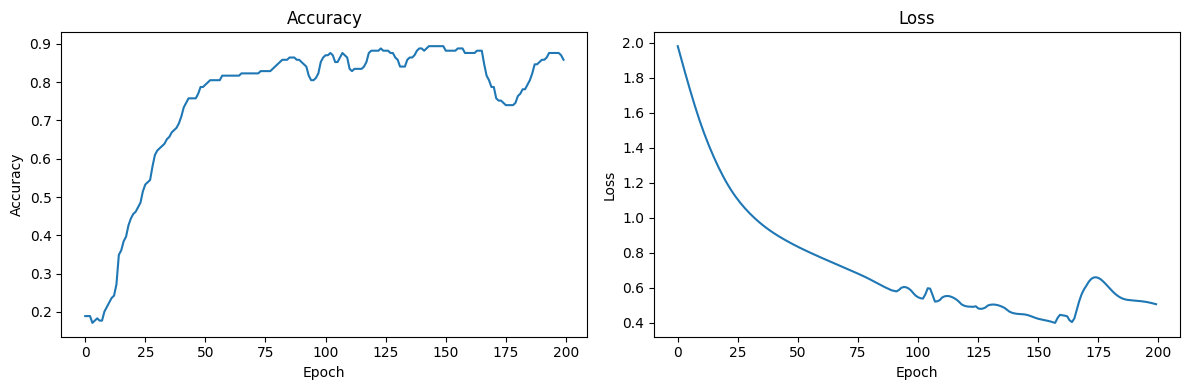

In [258]:
display_training_plot(history)

In [287]:
# Przygotowanie pliku do przetestowania
downtime_part = df[df["Category"] == "DOWNTIME"]['Accelerometer'].iloc[0]
climbing_part = df[df["Category"] == "CLIMBING"]['Accelerometer'].iloc[0]
falling_part = df[df["Category"] == "FALLING"]['Accelerometer'].iloc[0]
walking_part = df[df["Category"] == "WALKING"]['Accelerometer'].iloc[4]

test_labels_list = ['DOWNTIME','CLIMBING','FALLING','WALKING']
test_labels = np.array(test_labels_list)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(test_labels)

file = []
file.append(downtime_part)
file.append(climbing_part)
file.append(falling_part)
file.append(walking_part)

In [288]:
X_test = np.array([np.array(sample) for sample in file])  # Zmieniamy na listę list

# Przekształcenie danych testowych do oczekiwanego formatu
X_test = np.expand_dims(X_test, axis=0)
X_test = X_test.tolist()
X_test = tf.ragged.constant(X_test)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test))

# Ewaluacja modelu na danych testowych
predictions = model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

print(predicted_labels)
# Odkodowanie etykiet
decoded_labels = label_encoder.inverse_transform(predicted_labels)

# Wyświetlenie sklasyfikowanych części
for i, part in enumerate(decoded_labels):
    print("Część", i+1, ":", part)

1/1 [==============================] - 0s 17ms/step
[1 1 2 3]
Część 1 : DOWNTIME
Część 2 : DOWNTIME
Część 3 : FALLING
Część 4 : WALKING


2023-06-18 16:42:07.325678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [1]
	 [[{{node Placeholder/_0}}]]
